In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
all_features = [
    'nameLen', 'methodLoc', '#for', '#while', '#do', '#nestedLoops', '#if', '#switch', '#case', '#return',
    '#throw', '#catch', 'cyclo', '#vars', '#methodCalls', '#internalCalls', '#externalCalls', 'usesJavaUtil',
    'usesJavaLangThread', 'usesJavaUtilConcurrent', 'usesJavaIo', 'usesJavaNio', 'usesJavaNioChannels',
    'usesJavaNioFile', 'usesJavaNioCharset', 'usesJavaNet', 'usesJavaxNetSsl', 'usesJavaLang',
    'usesJavaLangManagement', 'usesJavaUtilRegex', 'usesJavaText', 'usesJavaMath', 'execution_time',
    'methodScope_private', 'methodScope_protected', 'methodScope_public'
]

print("Total features:", len(all_features))

Total features: 36


In [3]:
# --- Your selected features per technique ---
selected_features = {
    'AutoSpearman': ['nameLen', '#for', '#while', '#do', '#nestedLoops', '#if', '#switch', '#return', '#throw',
                     '#catch', '#vars', '#internalCalls', '#externalCalls', 'usesJavaUtil',
                     'usesJavaUtilConcurrent', 'usesJavaIo', 'usesJavaNet', 'usesJavaLang', 'usesJavaText',
                     'usesJavaMath', 'log_execution_time', 'methodScope_private'],

    'SelectKBest_20': ['methodLoc', '#while', '#do', '#nestedLoops', '#if', '#switch', '#return', '#throw',
                       '#catch', 'cyclo', '#vars', '#internalCalls', 'usesJavaUtilConcurrent', 'usesJavaIo',
                       'usesJavaLang', 'usesJavaText', 'usesJavaMath', 'log_execution_time',
                       'methodScope_private', 'methodScope_public'],

    'SelectKBest_10': ['#while', '#do', '#if', '#switch', '#catch', 'cyclo', 'usesJavaMath', 'log_execution_time',
                       'methodScope_private', 'methodScope_public'],

    'SelectKBest_30': ['nameLen', 'methodLoc', '#for', '#while', '#do', '#nestedLoops', '#if', '#switch',
                       '#return', '#throw', '#catch', 'cyclo', '#vars', '#methodCalls', '#internalCalls',
                       '#externalCalls', 'usesJavaUtil', 'usesJavaUtilConcurrent', 'usesJavaIo',
                       'usesJavaNioCharset', 'usesJavaNet', 'usesJavaxNetSsl', 'usesJavaLang',
                       'usesJavaLangManagement', 'usesJavaUtilRegex', 'usesJavaText', 'usesJavaMath',
                       'log_execution_time', 'methodScope_private', 'methodScope_public'],

    'RFECV': ['nameLen', 'cyclo', 'log_execution_time']
}

# Features dropped by VarianceThreshold
dropped_by_variance = [
    '#case', 'usesJavaLangThread', 'usesJavaNio', 'usesJavaNioChannels',
    'usesJavaNioFile', 'usesJavaNioCharset', 'usesJavaNet', 'usesJavaxNetSsl',
    'usesJavaLangManagement', 'usesJavaUtilRegex', 'usesJavaText'
]

# Get features selected by VarianceThreshold
selected_features['VarianceThreshold'] = [f for f in all_features if f not in dropped_by_variance]

In [4]:
# Count how many features were selected by each technique
technique_feature_counts = {tech: len(feats) for tech, feats in selected_features.items()}

# Display as a DataFrame for clarity
technique_count_df = pd.DataFrame.from_dict(technique_feature_counts, orient='index', columns=['Selected Feature Count'])
technique_count_df = technique_count_df.sort_values(by='Selected Feature Count', ascending=False)
print(technique_count_df)


                   Selected Feature Count
SelectKBest_30                         30
VarianceThreshold                      25
AutoSpearman                           22
SelectKBest_20                         20
SelectKBest_10                         10
RFECV                                   3


In [5]:
# Count all selected features
all_selected = [feat for feats in selected_features.values() for feat in feats]
feature_counts = Counter(all_selected)

# Create frequency DataFrame
feature_freq_df = pd.DataFrame(feature_counts.items(), columns=["Feature", "Selected_By"])

# Build groups: frequency → alphabetically sorted feature list
frequency_groups = {}
for freq in sorted(feature_freq_df["Selected_By"].unique()):
    group_features = feature_freq_df[feature_freq_df["Selected_By"] == freq]["Feature"].tolist()
    frequency_groups[freq] = sorted(group_features)  # Sort alphabetically (or use another key here)


In [6]:
# Sort frequency → features mapping by frequency (descending)
sorted_items = sorted(frequency_groups.items(), key=lambda x: x[0], reverse=True)

C:\Users\Muhammad Imran\AppData\Local\Temp\ipykernel_33412\1640723726.py:72: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


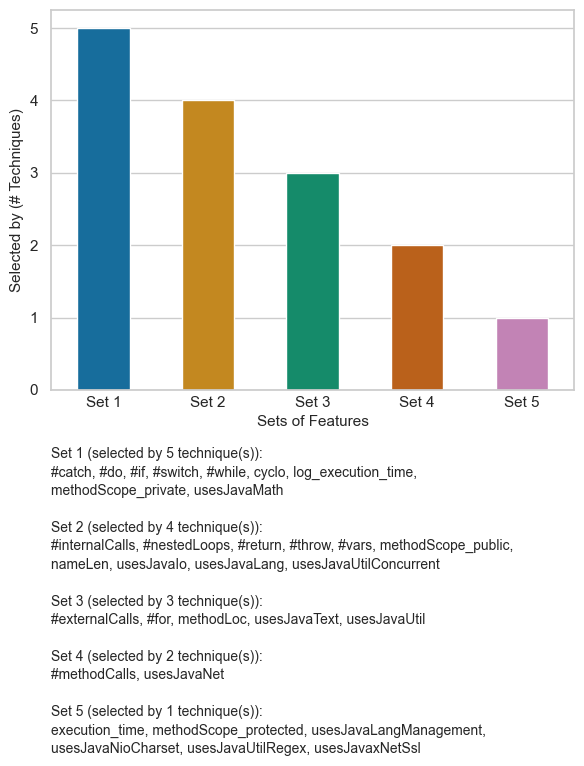

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import textwrap

# Set style
sns.set(style="whitegrid", palette="colorblind")
palette = sns.color_palette("colorblind")

# Bar chart data
set_labels = [f"Set {i}" for i, _ in enumerate(sorted_items, start=1)]
y_values = [freq for freq, _ in sorted_items]

plot_df = pd.DataFrame({
    "Set": set_labels,
    "Selected_By_Techniques": y_values
})


# Prepare legend
wrap_width = 80
legend_texts = []
for i, (_, features) in enumerate(sorted_items, start=1):
    feature_list = ", ".join(features)
    wrapped = textwrap.fill(feature_list, width=wrap_width)
    label = f"Set {i} (selected by {y_values[i-1]} technique(s)):\n{wrapped}"
    legend_texts.append(label)



# Subplots with tighter width
fig, (ax_bar, ax_legend) = plt.subplots(
    nrows=2,
    figsize=(6, 8),
    gridspec_kw={'height_ratios': [2.5, 1.5]},
    constrained_layout=True
)

# set bars width
bar_width = 0.5  # Adjust bar width as needed
# Bar chart
sns.barplot(
    data=plot_df,
    x="Set",
    y="Selected_By_Techniques",
    palette=palette[:len(set_labels)],
    ax=ax_bar,
    width=bar_width  # Set bar width

)
ax_bar.set_xlabel("Sets of Features", fontsize=11)
ax_bar.set_ylabel("Selected by (# Techniques)", fontsize=11)
# ax_bar.set_title("Technique Agreement per Feature Set", fontsize=13)
# ax_bar.set_ylim(0, max(y_values))
ax_bar.tick_params(axis='x')
ax_bar.tick_params(axis='y')
# plt.xticks(rotation=60, ha='right', fontsize=12, rotation_mode='anchor')
# plt.ticklabel_format(style='plain', useOffset=False, axis='y')
ax_bar.tick_params(axis='x', which='major', pad=-2)

# Legend text
ax_legend.axis("off")
legend_full_text = "\n\n".join(legend_texts)
ax_legend.text(
    0, 1, legend_full_text,
    fontsize=10,
    va='top',
    ha='left',
    linespacing=1.4
)

plt.tight_layout()
plt.savefig("plt_RQ2c_feature_sets_bottom_legend.pdf", bbox_inches='tight')
plt.show()


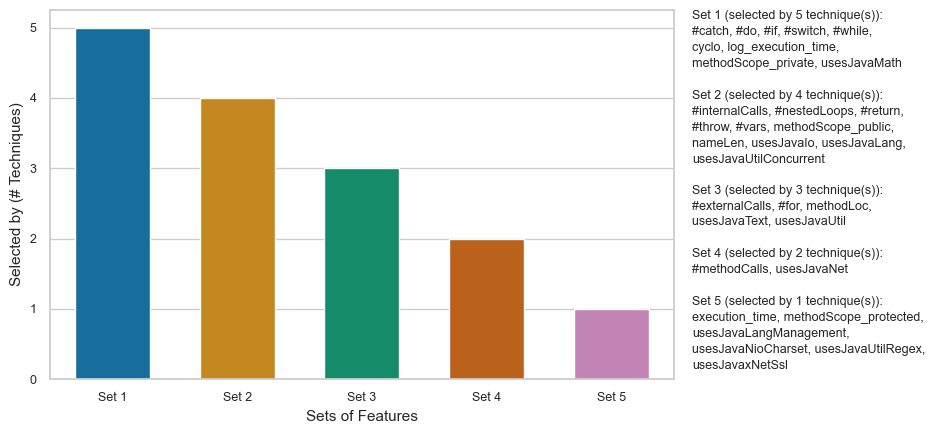

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import textwrap

# Set style
sns.set(style="whitegrid", palette="colorblind")
palette = sns.color_palette("colorblind")

# Bar chart data
set_labels = [f"Set {i}" for i, _ in enumerate(sorted_items, start=1)]
y_values = [freq for freq, _ in sorted_items]

plot_df = pd.DataFrame({
    "Set": set_labels,
    "Selected_By_Techniques": y_values
})

# Prepare legend text
wrap_width = 40  # smaller for narrow right panel
legend_texts = []
for i, (_, features) in enumerate(sorted_items, start=1):
    feature_list = ", ".join(features)
    wrapped = textwrap.fill(feature_list, width=wrap_width)
    label = f"Set {i} (selected by {y_values[i-1]} technique(s)):\n{wrapped}"
    legend_texts.append(label)

# === Create side-by-side subplots ===
fig, (ax_bar, ax_legend) = plt.subplots(
    ncols=2,
    figsize=(10, 4.5),
    gridspec_kw={'width_ratios': [2.5, 1]}
)

# Bar chart
sns.barplot(
    data=plot_df,
    x="Set",
    y="Selected_By_Techniques",
    palette=palette[:len(set_labels)],
    ax=ax_bar,
    width=0.6
)
ax_bar.set_xlabel("Sets of Features", fontsize=11)
ax_bar.set_ylabel("Selected by (# Techniques)", fontsize=11)
# ax_bar.set_ylim(0, max(y_values) + 1)
ax_bar.tick_params(axis='x', labelsize=9)
ax_bar.tick_params(axis='y', labelsize=9)

# Legend block (text-based)
ax_legend.axis("off")
legend_full_text = "\n\n".join(legend_texts)
ax_legend.text(
    0, 1, legend_full_text,
    fontsize=9,
    va='top',
    ha='left',
    linespacing=1.4
)

# Save and display
plt.tight_layout()
plt.savefig("plt_RQ2c_feature_sets_right_legend.pdf", bbox_inches='tight')
plt.show()


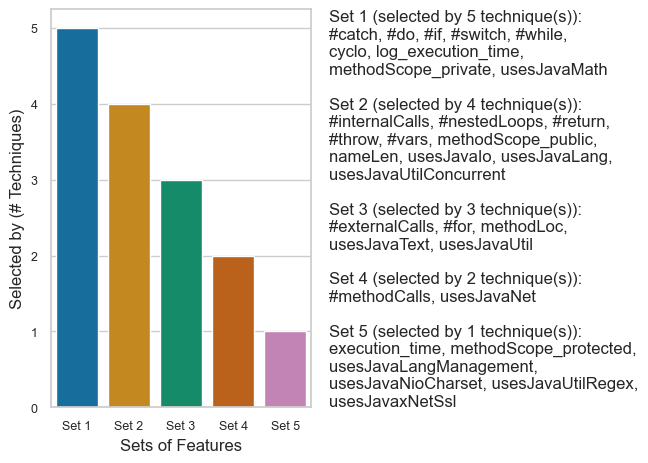

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import textwrap

# Set style
sns.set(style="whitegrid", palette="colorblind", context="notebook")
palette = sns.color_palette("colorblind")

# Bar chart data
set_labels = [f"Set {i}" for i, _ in enumerate(sorted_items, start=1)]
y_values = [freq for freq, _ in sorted_items]

plot_df = pd.DataFrame({
    "Set": set_labels,
    "Selected_By_Techniques": y_values
})

# Prepare legend text
wrap_width = 40  # smaller for narrow right panel
legend_texts = []
for i, (_, features) in enumerate(sorted_items, start=1):
    feature_list = ", ".join(features)
    wrapped = textwrap.fill(feature_list, width=wrap_width)
    label = f"Set {i} (selected by {y_values[i-1]} technique(s)):\n{wrapped}"
    legend_texts.append(label)

# === Create side-by-side subplots ===
fig, (ax_bar, ax_legend) = plt.subplots(
    ncols=2,
    # figsize=(10, 4.5),
    gridspec_kw={'width_ratios': [2.5, 1]}
)

# Bar chart
sns.barplot(
    data=plot_df,
    x="Set",
    y="Selected_By_Techniques",
    palette=palette[:len(set_labels)],
    ax=ax_bar
    # width=0.6
)
ax_bar.set_xlabel("Sets of Features")
ax_bar.set_ylabel("Selected by (# Techniques)")
# ax_bar.set_ylim(0, max(y_values) + 1)
ax_bar.tick_params(axis='x', labelsize=9)
ax_bar.tick_params(axis='y', labelsize=9)

# Legend block (text-based)
ax_legend.axis("off")
legend_full_text = "\n\n".join(legend_texts)
ax_legend.text(
    0, 1, legend_full_text,
    # fontsize=9,
    va='top',
    ha='left'
)

# Save and display
plt.tight_layout()
plt.savefig("plt_RQ2c_feature_sets_right_legend.pdf", bbox_inches='tight')
plt.show()
